In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Regression Task

In [95]:
data_reg = pd.read_csv('AirQualityUCI.csv', sep = ';', na_values=-200, decimal = ',')
data_reg.shape

(9471, 17)

In [97]:
data_reg

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preparation

In [98]:
(data_reg.isna().sum() / data_reg.shape[0]).sort_values(ascending=False)

Unnamed: 16      1.000000
Unnamed: 15      1.000000
NMHC(GT)         0.903495
CO(GT)           0.189737
NO2(GT)          0.185408
NOx(GT)          0.185091
PT08.S5(O3)      0.050681
AH               0.050681
RH               0.050681
T                0.050681
PT08.S3(NOx)     0.050681
PT08.S4(NO2)     0.050681
PT08.S2(NMHC)    0.050681
C6H6(GT)         0.050681
PT08.S1(CO)      0.050681
Time             0.012037
Date             0.012037
dtype: float64

#### 1. We need to remove Unnamed Columns and NMHC(GT) because they have too many missing values and will be useless

#### 2. Combine Date and Time and put it as index

#### 3. And as seen, there are a lot of Null rows at the end of data

In [99]:
data_reg.drop(columns=['Unnamed: 15', 'Unnamed: 16', 'NMHC(GT)'], axis=1, inplace=True)

Now lets combine Date and Time columns and set it as index of our data

In [101]:
data_reg.Time = data_reg.Time.str.replace('.',':')
data_reg.Date = data_reg["Date"] + ' ' + data_reg['Time']
data_reg.Date = pd.to_datetime(data_reg.Date, infer_datetime_format=True)
data_reg = data_reg.set_index('Date')
data_reg.drop(['Time'], axis = 1, inplace = True)

C:\Users\orazk\AppData\Local\Temp\ipykernel_22120\759789671.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data_reg.Date = pd.to_datetime(data_reg.Date, infer_datetime_format=True)
C:\Users\orazk\AppData\Local\Temp\ipykernel_22120\759789671.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_reg.Date = pd.to_datetime(data_reg.Date, infer_datetime_format=True)


Remove null rows

In [104]:
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9471 entries, 2004-10-03 18:00:00 to NaT
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7674 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   C6H6(GT)       8991 non-null   float64
 3   PT08.S2(NMHC)  8991 non-null   float64
 4   NOx(GT)        7718 non-null   float64
 5   PT08.S3(NOx)   8991 non-null   float64
 6   NO2(GT)        7715 non-null   float64
 7   PT08.S4(NO2)   8991 non-null   float64
 8   PT08.S5(O3)    8991 non-null   float64
 9   T              8991 non-null   float64
 10  RH             8991 non-null   float64
 11  AH             8991 non-null   float64
dtypes: float64(12)
memory usage: 961.9 KB


Lets remove rows that have more than half missing features

In [107]:
bad_rows = data_reg[data_reg.shape[1] - data_reg.count(axis=1) > 5].index
data_reg.drop(bad_rows, axis = 0, inplace = True)

In [108]:
data_reg.isna().sum()

CO(GT)           1647
PT08.S1(CO)         0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)          1595
PT08.S3(NOx)        0
NO2(GT)          1598
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
dtype: int64

We see that there are 3 columns with missing values

Lets take a look at them 

array([[<Axes: title={'center': 'CO(GT)'}>,
        <Axes: title={'center': 'NOx(GT)'}>],
       [<Axes: title={'center': 'NO2(GT)'}>, <Axes: >]], dtype=object)

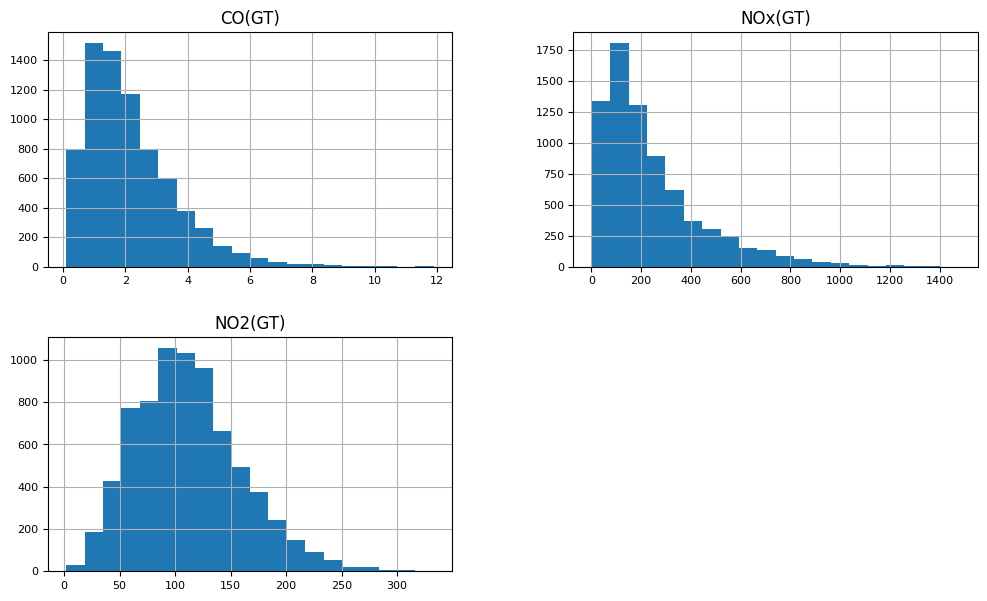

In [109]:
data_reg[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].hist(figsize=(12, 7), bins=20, xlabelsize=8, ylabelsize=8)

Since these columns are skewed, it makes sense to impute them with corresponding medians

In [111]:
to_fill = {}

for i in ['CO(GT)', 'NOx(GT)', 'NO2(GT)']:
    to_fill[i] = np.nanmedian(data_reg[i])

data_reg = data_reg.fillna(value = to_fill)

data_reg.isna().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Finally we dont have missing values

#### Split the data according to timeline and approximately 0.2 test set

In [112]:
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8991 entries, 2004-10-03 18:00:00 to 2005-04-04 14:00:00
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         8991 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   C6H6(GT)       8991 non-null   float64
 3   PT08.S2(NMHC)  8991 non-null   float64
 4   NOx(GT)        8991 non-null   float64
 5   PT08.S3(NOx)   8991 non-null   float64
 6   NO2(GT)        8991 non-null   float64
 7   PT08.S4(NO2)   8991 non-null   float64
 8   PT08.S5(O3)    8991 non-null   float64
 9   T              8991 non-null   float64
 10  RH             8991 non-null   float64
 11  AH             8991 non-null   float64
dtypes: float64(12)
memory usage: 913.1 KB


In [114]:
data_reg.shape

(8991, 12)

In [115]:
data_reg = data_reg.sort_index()
train, test = data_reg.iloc[:8000,:], data_reg.iloc[8000:,:]
X_train, y_train, X_test, y_test = train.drop('C6H6(GT)', axis=1), train['C6H6(GT)'], test.drop('C6H6(GT)', axis=1), test['C6H6(GT)']

### Scaling

In [116]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [117]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling 

### Decision Tree

In [166]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

In [167]:
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=0)

In [168]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_dtr = dtr.predict(X_test_scaled)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)
print("MSE for Decision Tree Regressor:", mse_dtr)
print("R^2 for Decision Tree Regressor:", r2_dtr)

MSE for Decision Tree Regressor: 0.001261352169525733
R^2 for Decision Tree Regressor: 0.9999721322075967


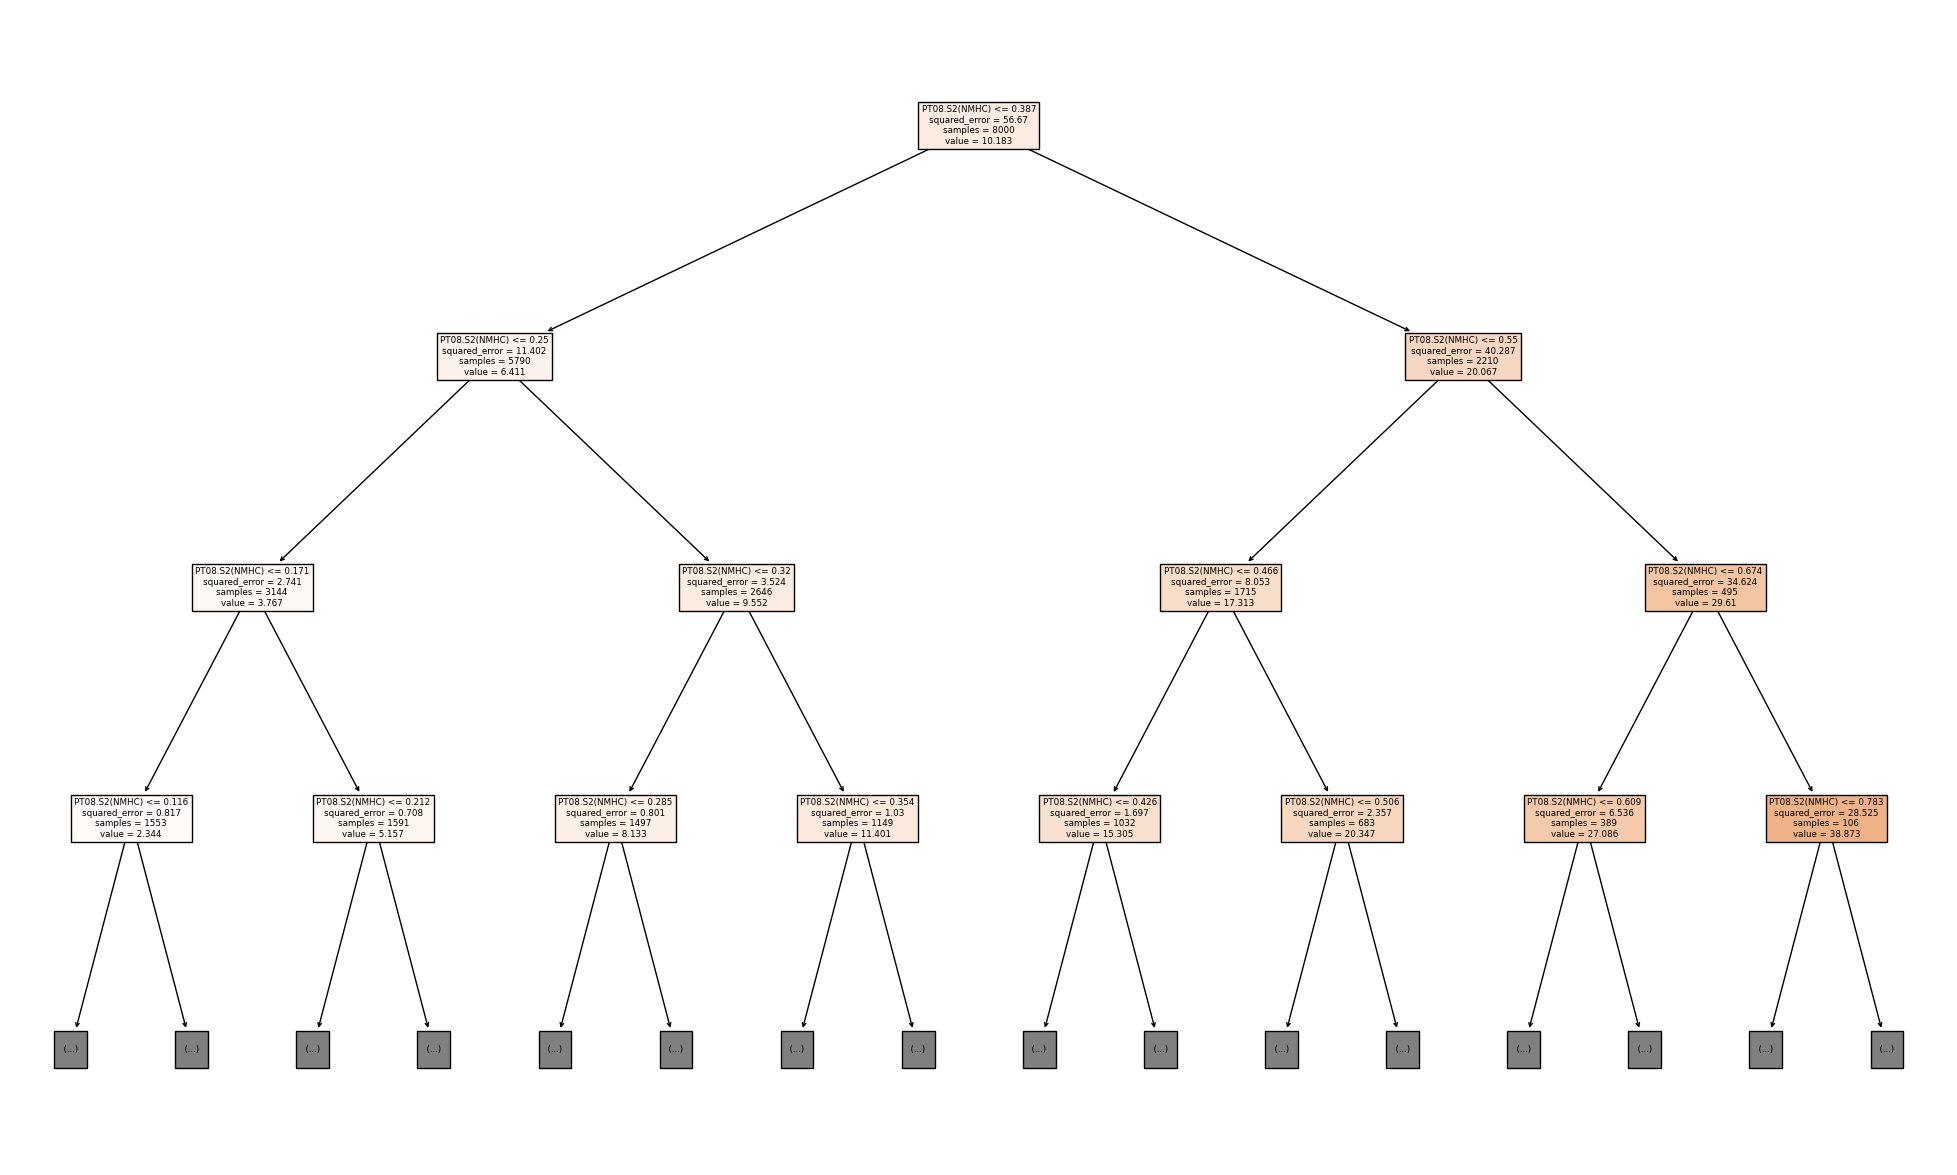

In [169]:
plt.figure(figsize=(25,15))
plot_tree(dtr, filled=True, feature_names=X_train.columns, max_depth=3)
plt.show()

##### Comment on Visualisation

It seems that the tree uses the features PT08.S2(NMHC) to make decisions, splitting the data based on certain threshold values of these features. These thresholds are chosen to best separate the target variable's values based on the training data.

### Random Forest

In [170]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=0)

In [171]:
y_pred_rfr = rfr.predict(X_test_scaled)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)
print("MSE for Random Forest Regressor:", mse_rfr)
print("R^2 for Random Forest Regressor:", r2_rfr)

MSE for Random Forest Regressor: 0.0006247366296670359
R^2 for Random Forest Regressor: 0.9999861973276593


### Boosting Regressor (XGBoost)

In [172]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(random_state=0)
xgbr.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [173]:
y_pred_xgbr = xgbr.predict(X_test_scaled)
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)
r2_xgbr = r2_score(y_test, y_pred_xgbr)
print("MSE for XGBoost Regressor:", mse_xgbr)
print("R^2 for XGBoost Regressor:", r2_xgbr)

MSE for XGBoost Regressor: 0.01466577308986864
R^2 for XGBoost Regressor: 0.999675980483662


### Hyperparamer Tuning

#### Decision tree

**max_depth** : Determines the maximum depth of the tree. A deeper tree can model more complex relationships but can also lead to overfitting.

**min_samples_split** : The minimum number of samples required to split an internal node. Adjusting this helps prevent overfitting.

**min_samples_leaf** : Minimum number of samples required to be at a leaf node. It also contributes to preventing the model from overfitting.

In [175]:
from sklearn.model_selection import GridSearchCV

##### Explanation of metrics

In [176]:
# Define the parameter grid
param_grid_dtr = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search_dtr = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid_dtr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_dtr.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [177]:
# Best parameters and score
print("Best parameters for Decision Tree Regressor:", grid_search_dtr.best_params_)
print("Best score:", -grid_search_dtr.best_score_)

Best parameters for Decision Tree Regressor: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score: 0.032491746233451385


The depth of the tree was allowed to expand to 10 levels, which suggests that the data has complex patterns and the model needs to go deeper to learn the nuances. A min_samples_leaf of 2 ensures that the tree does not create leaves with less than two samples, which helps in preventing the model from learning the noise in the training data. Similarly, a min_samples_split of 2 indicates that splits that separate the data into at least two samples are considered, which, along with min_samples_leaf, helps to control overfitting.


#### Random forest

##### Explanation of metrics

**n_estimators** : Number of trees in the forest. More trees increase performance but also computational cost.

**max_features** : The number of features to consider when looking for the best split. It influences the diversity of trees in the forest

Remaining metrics explanations are same as for Decision Tree

In [178]:
# Define the parameter grid
param_grid_rfr = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search_rfr = GridSearchCV(RandomForestRegressor(random_state=0), param_grid_rfr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rfr.fit(X_train_scaled, y_train)

c:\Users\orazk\miniconda3\envs\epam_env\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
358 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\orazk\miniconda3\envs\epam_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\orazk\miniconda3\envs\epam_env\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\orazk\miniconda3\envs\epam_env\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [179]:
# Best parameters and score
print("Best parameters for Random Forest Regressor:", grid_search_rfr.best_params_)
print("Best score:", -grid_search_rfr.best_score_)

Best parameters for Random Forest Regressor: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.509318043478201


 A max_depth of 30 allows individual trees to grow deep enough to fit the data well, while max_features set to sqrt suggests using a subset of the total features for each split decision, which introduces randomness and helps with generalization. The min_samples_leaf and min_samples_split parameters are set to 2, similar to the Decision Tree, to prevent overfitting. A relatively small number of trees (n_estimators: 50) was found to be sufficient, implying that adding more trees does not improve the model performance significantly for this dataset.

#### XGBoosting

##### Explanation of metrics

**n_estimators** : Number of gradient boosted trees. Too few may underfit, too many may overfit.

**learning_rate** : Shrinks the feature weights to make the boosting process more conservative and prevent overfitting.

**subsample** : The fraction of samples to be used for fitting the individual base learners. Prevents overfitting.

**colsample_bytree** : The fraction of features to be used for each tree. A smaller value provides more diversity.

In [180]:
# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Create a GridSearchCV object
grid_search_xgb = GridSearchCV(xgb.XGBRegressor(random_state=0), param_grid_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_xgb.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=0, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [181]:
# Best parameters and score
print("Best parameters for XGBoost Regressor:", grid_search_xgb.best_params_)
print("Best score:", -grid_search_xgb.best_score_)

Best parameters for XGBoost Regressor: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best score: 0.16921265009064224


 The colsample_bytree of 0.9 indicates that a large fraction of features are used for building each tree, which could mean that most features are important for making predictions. A learning rate of 0.1 is relatively fast and might indicate that the model converges well with a more aggressive update. max_depth of 7 suggests complexity in the data that requires deeper trees to model. The subsample parameter set to 0.8 indicates that 80% of the data is used for training each tree, which helps in preventing overfitting by adding more randomness to the process

### Feature Importance with best parameters

#### Decision tree

In [182]:
best_dtr_params = grid_search_dtr.best_params_
best_dtr = DecisionTreeRegressor(**best_dtr_params, random_state=42)
best_dtr.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, random_state=42)

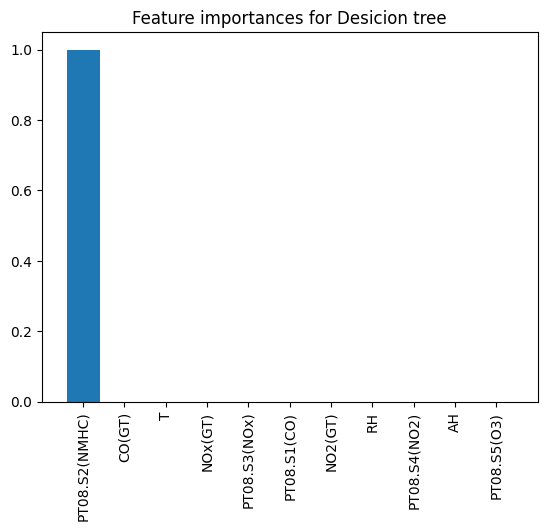

In [183]:
# Example for Random Forest
importances = best_dtr.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances for Desicion tree")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

The bar plot shows that PT08.S2(NMHC) is by far the most important feature, with almost complete importance, while all other features have negligible importance. This might indicate that PT08.S2(NMHC) alone is an excellent predictor of the target variable or that other features are redundant when PT08.S2(NMHC) is used.

#### Random Forest

In [184]:
best_rfr_params = grid_search_rfr.best_params_
best_rfr = RandomForestRegressor(**best_rfr_params, random_state=42)
best_rfr.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=50, random_state=42)

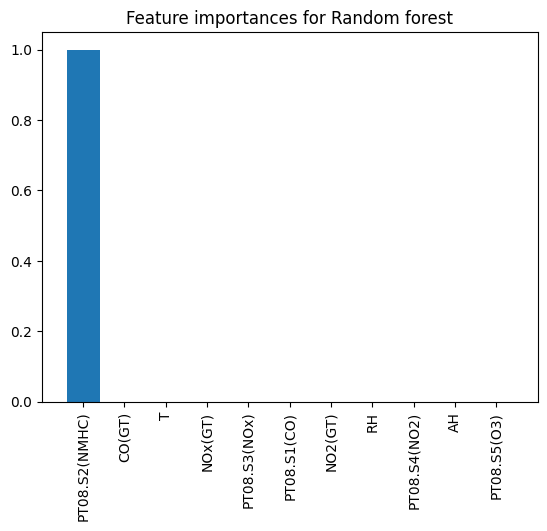

In [185]:
# Example for Random Forest
importances = best_dtr.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances for Random forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Similar to the Decision Tree, the Random Forest also identifies PT08.S2(NMHC) as the most important feature. This consistency across different tree-based models reinforces the idea that PT08.S2(NMHC) is a key predictor.

#### XGBoosting 

In [186]:
best_xgb_params = grid_search_xgb.best_params_
best_xgb = xgb.XGBRegressor(**best_xgb_params, random_state=42)
best_xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

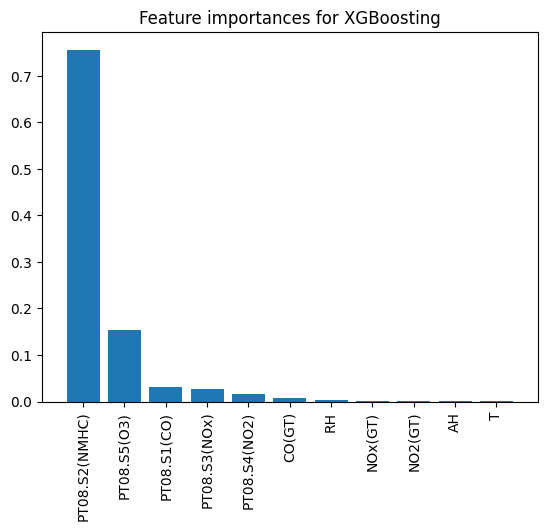

In [187]:
# Example for Random Forest
importances = best_xgb.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances for XGBoosting")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

While PT08.S2(NMHC) remains the most important feature in the XGBoost model, the importance is slightly less dominant than in the Decision Tree and Random Forest. Additionally, other features like PT08.S3(NOx) and PT08.S1(CO) show some importance, indicating that XGBoost is able to capture more complex interactions between features.

##### Insights

The consistency of PT08.S2(NMHC) being the most influential feature across all models suggests that it holds significant predictive power for the target variable. The other features appear to be less important, which might mean that the models are focusing on PT08.S2(NMHC) to make predictions, potentially overlooking useful information in other features. This could also lead to models that are less robust to changes or noise in the PT08.S2(NMHC) feature.

The interpretability analysis, especially in XGBoost, showing some level of importance for other features, suggests that while PT08.S2(NMHC) is important, other features should not be completely ignored, as they contribute to the overall prediction and could be crucial for making more nuanced predictions.

# Comparison with previous models

In the previous assignment focused on Linear Regression, we observed the following performance metrics:

**Mean Squared Error** (MSE): 0.01093

**Root Mean Squared Error** (RMSE): 0.09090

**R-squared** (R^2): 0.989991

In the current assignment, we explored different regression models:

**Decision Tree Regressor Score**: 0.99997

**Random Forest Regressor Score**: 0.99998

**XGBoost Regressor Score**: 0.99967

These scores indicate that the current models, which are based on tree-based regression techniques, also achieved high R^2 scores close to 1. This suggests that these models performed exceptionally well in capturing the variance of the target variable.

# Classification Task

In [242]:
data_cl = pd.read_csv('classification_data.csv')
data_cl.shape

(145460, 23)

In [243]:
data_cl.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,W,NNW,W,SE,ENE


In [244]:
((1 - data_cl.count() / data_cl.shape[0] ) * 100).sort_values(ascending=False)

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
Temp9am           1.214767
WindSpeed9am      1.214767
MinTemp           1.020899
MaxTemp           0.866905
Location          0.000000
Date              0.000000
dtype: float64

In [245]:
data = data_cl.copy()

In [246]:
data.Date = pd.to_datetime(data.Date, infer_datetime_format=True)

C:\Users\orazk\AppData\Local\Temp\ipykernel_22120\2887974768.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data.Date = pd.to_datetime(data.Date, infer_datetime_format=True)


In [247]:
data['Day'] = data.Date.dt.day
data['Month'] = data.Date.dt.month
data['Year'] = data.Date.dt.year

In [248]:
data = data.drop(columns='Date')

In [249]:
data.head().T

,0,1,2,3,4
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,W,NNW,W,SE,ENE
WindDir3pm,WNW,WSW,WSW,E,NW


Remove rows that have missing values of **RainTomorrow** values since it is our target value

In [250]:
data.dropna(subset=['RainTomorrow'], inplace=True)

In [251]:
# Show how many missing values in RainTomorrow
data['RainTomorrow'].isnull().sum()

0

## Feature Engineering

### Numerical Features

In [252]:
numerical = [col for col in data.columns if data[col].dtypes != 'O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Day',
 'Month',
 'Year']

In [253]:
# Show number of missing values
data[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Day                  0
Month                0
Year                 0
dtype: int64

#### Fill missing values

We need to fill the missing values. The most suitable method is to impute the median values because as previously found some features contain outliers.

In [254]:
for feature in numerical:
    feature_median = data[feature].median()
    data[feature].fillna(feature_median, inplace=True)

In [255]:
# Show number of missing values
data[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Day              0
Month            0
Year             0
dtype: int64

We see that no missing values left, now let's deal with outliers of numerical features ( Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm )

#### Remove Outliers in numerical

In [256]:
cols_with_outliers = ('Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm')

We need to find the interquartile range so we know what values(outliers) should replaced

In [257]:
def find_iqr(data, feature):
    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)
    lower_bound = data[feature].quantile(0.25) - (IQR * 3)
    upper_bound = data[feature].quantile(0.75) + (IQR * 3)

    return lower_bound, upper_bound

When finding an interquartile range I will use raw_data because the data variable has been modified by adding the medians into columns which will affect the range

In [258]:
for col in cols_with_outliers:
    lower_bound, upper_bound = find_iqr(data_cl, col)
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])

In [259]:
data[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.185565,23.225365,0.675580,5.145828,8.042236,39.920123,13.988030,18.640341,68.858235,51.495742,1017.648460,1015.252481,4.649568,4.702658,16.985681,21.675977,15.715084,6.402544,2012.758926
std,6.388936,7.109617,1.184153,2.813565,2.769638,13.140632,8.825786,8.701679,18.932512,20.532227,6.746267,6.681810,2.294357,2.118753,6.472206,6.871243,8.798150,3.426506,2.541256
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,1.000000,1.000000,2007.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,8.000000,3.000000,2011.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,16.000000,6.000000,2013.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,23.000000,9.000000,2015.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,31.000000,12.000000,2017.000000


Now we can notice there are no outliers in the Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm  columns

### Categorical features

In [260]:
categorical = [feature for feature in data.columns if data[feature].dtype=='O']
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [261]:
# Show missing values
data[categorical].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

#### Fill missing values

We will fill the missing values with the most frequent values of WindGustDir, WindDir9am, WindDir3pm, RainToday accordingly

In [262]:
data['WindGustDir'].fillna(data['WindGustDir'].mode()[0], inplace=True)
data['WindDir9am'].fillna(data['WindDir9am'].mode()[0], inplace=True)
data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0], inplace=True)
data['RainToday'].fillna(data['RainToday'].mode()[0], inplace=True)

In [263]:
data[categorical].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

#### Encode Categorical features using get_dummies

In [264]:
data[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [265]:
data['RainTomorrow'] = data['RainTomorrow'].replace({'Yes': 1, 'No': 0})

In [266]:
data = pd.concat([data[numerical], pd.get_dummies(data[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']]), data['RainTomorrow']], axis=1).reset_index(drop=True)

In [267]:
data.shape

(142193, 119)

In [268]:
data['RainTomorrow'].value_counts()

RainTomorrow
0    110316
1     31877
Name: count, dtype: int64

## Scale Data

#### Split data into X, y sets

In [269]:
X, y = data.drop(['RainTomorrow'], axis=1), data['RainTomorrow']

### Stratification of data

I will use stratification which ensures representative distribution of classes in both training and testing phases.

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [272]:
scaler = MinMaxScaler()

numerical_features = [col for col in X.columns if X[col].dtypes != 'O']

scaler.fit(X[numerical_features])

X[numerical_features] = scaler.transform(X[numerical_features])

In [273]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [274]:
X.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,...,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,0.487867,0.529780,0.211119,0.236047,0.554637,0.262947,0.254328,0.327024,0.688582,0.514957,...,0.067500,0.101559,0.064293,0.056332,0.064574,0.069701,0.060875,0.065608,0.778787,0.221213
std,0.150682,0.134397,0.370048,0.129063,0.191009,0.101865,0.160469,0.152661,0.189325,0.205322,...,0.250886,0.302069,0.245275,0.230562,0.245774,0.254643,0.239102,0.247597,0.415065,0.415065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379717,0.429112,0.000000,0.183486,0.565517,0.193798,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.483491,0.517958,0.000000,0.220183,0.586207,0.255814,0.236364,0.333333,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.596698,0.623819,0.187500,0.247706,0.600000,0.310078,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Handle Imbalanced Dataset

In [275]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [276]:
# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [277]:
print(f'Values distribution BEFORE SMOTE : {Counter(y_train)}')
print(f'Values distribution AFTER SMOTE : {Counter(y_train_smote)}')

Values distribution BEFORE SMOTE : Counter({0: 88218, 1: 25536})
Values distribution AFTER SMOTE : Counter({0: 88218, 1: 88218})


## Modelling 

### Decision Tree

In [293]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [279]:
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train_smote, y_train_smote)

DecisionTreeRegressor(random_state=0)

In [283]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_dtr = dtr.predict(X_test_scaled)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)
print("MSE for Decision Tree Regressor:", mse_dtr)
print("R^2 for Decision Tree Regressor:", r2_dtr)
print("Accuracy for Decision Tree Regressor:", accuracy_score(y_test, y_pred_dtr))

MSE for Decision Tree Regressor: 0.22525405253349273
R^2 for Decision Tree Regressor: -0.3001412369201557
Accuracy for Decision Tree Regressor: 0.7747459474665073


In [284]:
print(classification_report(y_test, y_pred_dtr))
print(confusion_matrix(y_test, y_pred_dtr))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     22098
           1       0.50      0.58      0.54      6341

    accuracy                           0.77     28439
   macro avg       0.68      0.71      0.69     28439
weighted avg       0.79      0.77      0.78     28439

[[18339  3759]
 [ 2647  3694]]


### Random Forest

I have already setted some parameters, because 

In [299]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=0, n_jobs=-1)
rfr.fit(X_train_smote, y_train_smote)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [300]:
y_pred_rfr = rfr.predict(X_test_scaled)
y_pred_rfr_binary = np.where(y_pred_rfr >= 0.5, 1, 0)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)
print("MSE for Random Forest Regressor:", mse_rfr)
print("R^2 for Random Forest Regressor:", r2_rfr)
print("Accuracy for Random Forest Regressor:", accuracy_score(y_test, y_pred_rfr_binary))

MSE for Random Forest Regressor: 0.11225897886704878
R^2 for Random Forest Regressor: 0.3520537100308244
Accuracy for Random Forest Regressor: 0.8444038116670769


In [303]:
print(classification_report(y_test, y_pred_rfr_binary))
print(confusion_matrix(y_test, y_pred_rfr_binary))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90     22098
           1       0.66      0.63      0.64      6341

    accuracy                           0.84     28439
   macro avg       0.78      0.77      0.77     28439
weighted avg       0.84      0.84      0.84     28439

[[20017  2081]
 [ 2344  3997]]


### Boosting Regressor (XGBoost)

In [305]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(random_state=0, n_jobs=-1)
xgbr.fit(X_train_smote, y_train_smote)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=0, ...)

In [308]:
y_pred_xgbr = xgbr.predict(X_test_scaled)
y_pred_xgbr_binary = np.where(y_pred_xgbr >= 0.5, 1, 0)
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)
r2_xgbr = r2_score(y_test, y_pred_xgbr)
print("MSE for XGBoost Regressor:", mse_xgbr)
print("R^2 for XGBoost Regressor:", r2_xgbr)
print("Accuracy for XGBoost Regressor:", accuracy_score(y_test, y_pred_xgbr_binary))

MSE for XGBoost Regressor: 0.10868838078881508
R^2 for XGBoost Regressor: 0.37266280340679914
Accuracy for XGBoost Regressor: 0.8509089630437076


In [309]:
print(classification_report(y_test, y_pred_xgbr_binary))
print(confusion_matrix(y_test, y_pred_xgbr_binary))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     22098
           1       0.70      0.57      0.63      6341

    accuracy                           0.85     28439
   macro avg       0.79      0.75      0.77     28439
weighted avg       0.84      0.85      0.84     28439

[[20586  1512]
 [ 2728  3613]]


### Hyperparamer Tuning

##### Explanation of metrics already given in the **first part**

#### Decision tree

In [ ]:
from sklearn.model_selection import GridSearchCV

In [310]:
# Define the parameter grid
param_grid_dtr = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search_dtr = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid_dtr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_dtr.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [311]:
# Best parameters and score
print("Best parameters for Decision Tree Regressor:", grid_search_dtr.best_params_)
print("Best score:", -grid_search_dtr.best_score_)

Best parameters for Decision Tree Regressor: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score: 0.14866974417230433


#### Random forest

In [314]:
# Define the parameter grid
param_grid_rfr = {
    'n_estimators': [50, 75],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 15],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 3]
}

# Create a GridSearchCV object
grid_search_rfr = GridSearchCV(RandomForestRegressor(random_state=0), param_grid_rfr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rfr.fit(X_train_smote, y_train_smote)

c:\Users\orazk\miniconda3\envs\epam_env\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
66 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\orazk\miniconda3\envs\epam_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\orazk\miniconda3\envs\epam_env\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\orazk\miniconda3\envs\epam_env\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_con

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 15],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 75]},
             scoring='neg_mean_squared_error')

In [315]:
# Best parameters and score
print("Best parameters for Random Forest Regressor:", grid_search_rfr.best_params_)
print("Best score:", -grid_search_rfr.best_score_)

Best parameters for Random Forest Regressor: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 75}
Best score: 0.12350225698129806


#### XGBoosting

In [317]:
# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [50, 75],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8]
}

# Create a GridSearchCV object
grid_search_xgb = GridSearchCV(xgb.XGBRegressor(random_state=0), param_grid_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_xgb.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=0, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8],
                         'learning_rate': [0.01, 0.05], 'max_depth': [3, 5],
                         'n_estimators': [50, 75], 'subsample': [0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [318]:
# Best parameters and score
print("Best parameters for XGBoost Regressor:", grid_search_xgb.best_params_)
print("Best score:", -grid_search_xgb.best_score_)

Best parameters for XGBoost Regressor: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 75, 'subsample': 0.7}
Best score: 0.12387594510108402


### Feature Importance with best parameters

In [333]:
def plot_top_n_feature_importances(importances, feature_names, name, n=5):
    # Sort the feature importances in descending order and get the indices
    indices = np.argsort(importances)[::-1]
    
    # Select the top n feature importances
    top_n_indices = indices[:n]
    top_n_importances = importances[top_n_indices]
    top_n_feature_names = [feature_names[i] for i in top_n_indices]
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.title(f"Top {n} Feature Importances for {name}")
    plt.bar(range(n), top_n_importances, align='center')
    plt.xticks(range(n), top_n_feature_names, rotation=45)
    plt.xlim([-1, n])
    plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
    plt.show()


#### Decision tree

In [319]:
best_dtr_params = grid_search_dtr.best_params_
best_dtr = DecisionTreeRegressor(**best_dtr_params, random_state=42)
best_dtr.fit(X_train_smote, y_train_smote)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, random_state=42)

In [ ]:
print(classification_report(y_test, y_pred_xgbr_binary))

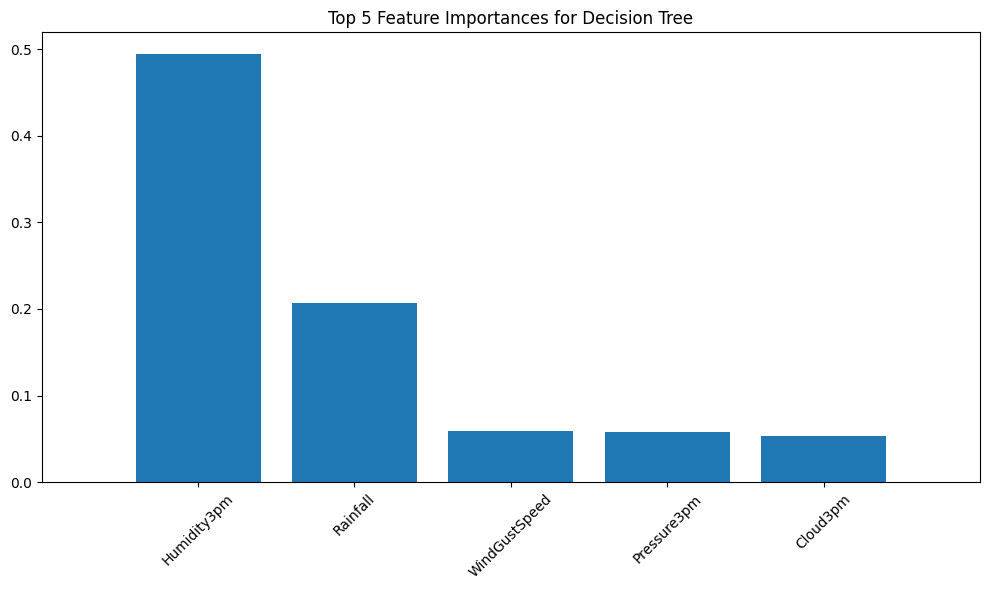

In [334]:
features = X_train.columns
importances_dt = best_dtr.feature_importances_
plot_top_n_feature_importances(importances_dt, features, 'Decision Tree')

The most important feature is **Humidity3pm**, which significantly outweighs the importance of all other features.

The feature Rainfall is the second most important, but it's less than half as important as **Humidity3pm**.

The remaining features **(WindGustSpeed, Pressure3pm, and Cloud3pm)** have relatively minor importance in comparison to **Humidity3pm.**

#### Random Forest

In [322]:
best_rfr_params = grid_search_rfr.best_params_
best_rfr = RandomForestRegressor(**best_rfr_params, random_state=42)
best_rfr.fit(X_train_smote, y_train_smote)

RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=75,
                      random_state=42)

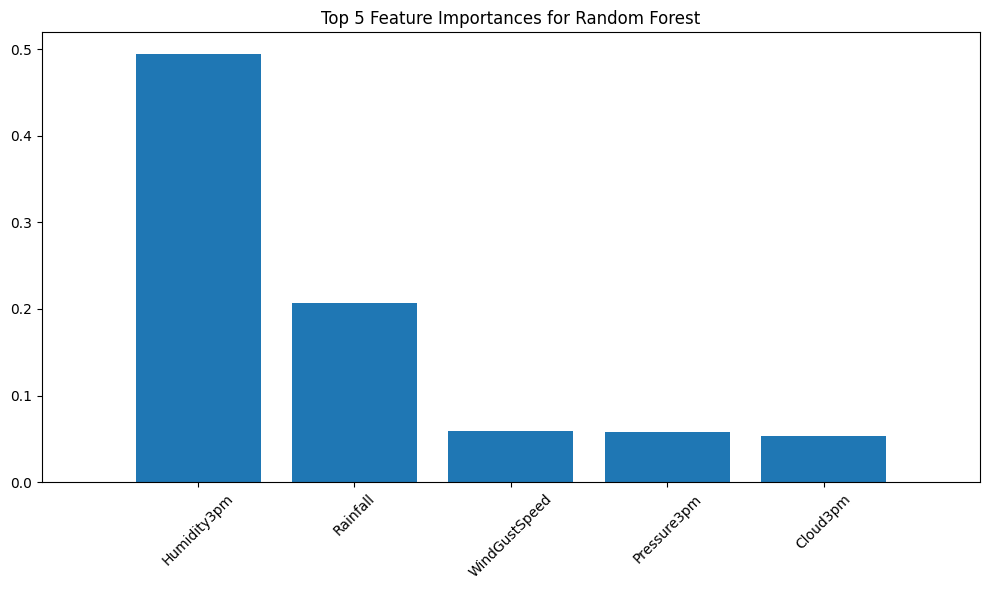

In [335]:
features = X_train.columns
importances_rfr = best_rfr.feature_importances_
plot_top_n_feature_importances(importances_dt, features, 'Random Forest')

As with the **Decision Tree**, **Humidity3pm** is the most important feature, indicating a strong consensus between the models on the importance of this feature.

The **Random Forest** model gives a little more importance to **Rainfall** compared to the Decision Tree model.

The importance of features is more evenly distributed among the top 5, although **Humidity3pm** still stands out.

#### XGBoosting 

In [324]:
best_xgb_params = grid_search_xgb.best_params_
best_xgb = xgb.XGBRegressor(**best_xgb_params, random_state=42)
best_xgb.fit(X_train_smote, y_train_smote)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=75, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

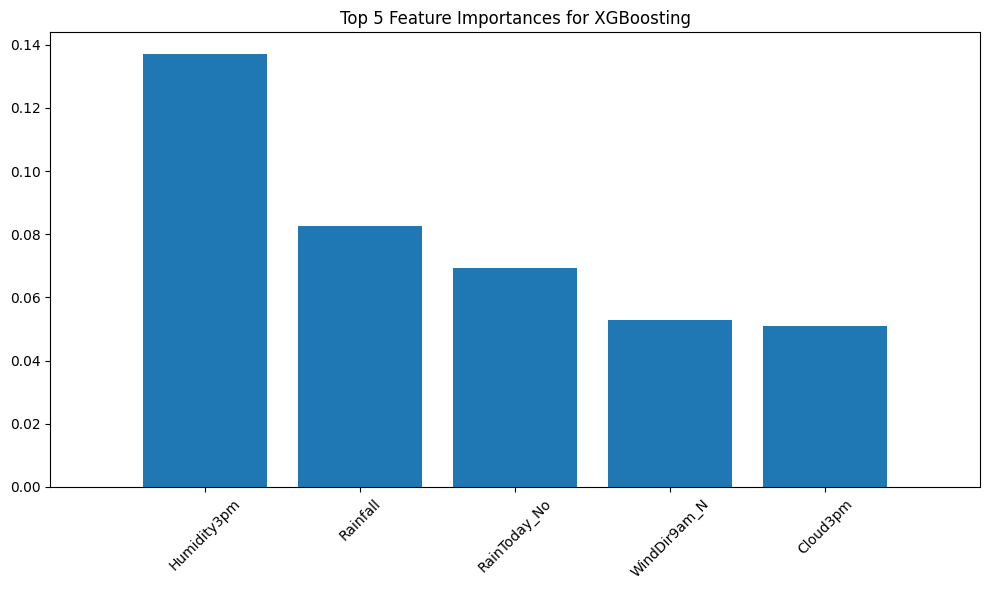

In [336]:
features = X_train.columns
importances_xgb = best_xgb.feature_importances_
plot_top_n_feature_importances(importances_xgb, features, 'XGBoosting')

The **XGBoost** model also identifies **Humidity3pm** as the most crucial predictor, which is consistent across all three models.

**Rainfall and RainToday_No** are relatively close in their levels of importance, suggesting that **XGBoost** is picking up on more nuanced interactions between the features.

The difference in importance between the top feature and the others is less pronounced than in the Decision Tree model, indicating a more balanced reliance on multiple features.

#### Insights



**Consistency Across Models**: All three models agree on the prominence of Humidity3pm, which suggests that this feature is a strong predictor for the target variable. This could be due to a direct physical correlation or a strong association with other variables.

**Differentiation in Importance**: While there is consensus on the most important feature, the models differ in how they rank the remaining features. This could be due to the different ways each model handles feature interactions and nonlinear relationships.

**Model-Specific Insights**: The Decision Tree provides the simplest form of interpretability due to its single-path decision-making process, making it very transparent. The Random Forest offers a more robust interpretation by averaging multiple trees, thus reducing variance. XGBoost provides an interpretation that considers both feature interactions and the sequential improvement of predictions.

**Best Parameters and Scores**: The reported best scores and parameters from the grid search indicate that all models are relatively well-tuned, although the Random Forest and XGBoost have similar scores and outperform the Decision Tree. This could be due to the ensemble nature of Random Forest and the boosting aspect of XGBoost, both of which typically provide better generalization than a single Decision Tree.

# The comparison with first classfication homework

#### Previous Models
**Linear Regression:**

Accuracy: 60%
Precision: 30%
Recall : 20%
F1 Score ): 25%

**KNN:**

Accuracy: 40%
Precision : 25%
Recall : 80%
F1 Score : 64%

**Naive Bayes Model:**

Accuracy: 65%
Precision : 22%
Recall : 15%
F1 Score : 18%

**SVM:**

Accuracy: 60%
Precision : 40%
Recall : 95%
F1 Score : 50%

#### **Tree-Based Models:**

**XGBoost:**

Accuracy: 85%
Precision : 66%
Recall : 63%
F1 Score : 64%

**Random Forest:**

Accuracy: 84%
Precision : 66%
Recall : 73%
F1 Score : 69%

**Decision Tree:**

Accuracy: 77%
Precision : 50%
Recall : 58%
F1 Score : 54%

#### Overall Comparison:

XGBoost stands out as the most effective model with high scores across all metrics.

Random Forest follows closely, with notable strength in recall, making it preferable for situations where catching positive instances is crucial.

SVM from the first homework has impressive recall and a respectable F1 score but doesn't match the overall performance of the tree-based models.

KNN, despite lower accuracy, has a high recall and F1 score, useful in scenarios where recall matters more than precision.

Logistic Regression and Naive Bayes show weaker performance, particularly in precision and F1 score.

#### **Conclusion:**

Tree-based models (XGBoost and Random Forest) from the current homework outperform classical models from the first homework in overall accuracy and F1 score.
For high true positive rates, tree-based models are preferable, with Random Forest slightly edging out in recall.
If the domain demands minimizing false negatives at the cost of more false positives, SVM remains a strong contender due to its high recall."